### Analysing the Pizza Sales Data

Pizza is considered a special food universally due to a combination of addictive, saavoury and unresistable ingredients which triggers cravings e.g glutamate in cheese and tomato. it comes in different ingredient combination, different flavour, different taste and sizes. in order to satisfy vegans, a veggie category of pizza is also available in many countries.

According to some online sources, the Pizza industry is worth over $160 billion and still holds the potential to be higher. it is however important for the pizza place to not only attract new customers but also retain existing customers. some factors that drives Pizza sales are as follows:
- Size : Pizza is mostly meant to be shared. offering a family or party package might help in driving sales.
- Variety: giving customers many flavour options ultimately drives sales
- Other factors are: building customer loyalty, getting your homepage show up in Google, online information update and so on.
The purpose of this analysis is to understand trends in pizza sales, identify good performance and highlight challenges that should be tackled. There are five dataset used for this analysis as follows:

- Order details: Shows the Order ID, Pizza ID and the quantity of order
- Orders: Shows Order ID, date and time of order.
- Pizza - Shows Pizza ID, Pizza type ID, size and Price
- Pizza_type: Shows the pizza name, category, ingredients and the Pizza type ID
- data_dictionary: describes the tables and fields in the four csv files above. it also indicates the unique ID and foreign keys.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

### Importing and Merging Database

In [2]:
pizzas_df = pd.read_csv(r"C:\Users\abdul\Downloads\TechCrush DS\DATASETS-20260127T133424Z-3-001\DATASETS\Pizza-Place-Sales\pizza_sales\pizzas.csv")
pizza_types_df = pd.read_csv(r"C:\Users\abdul\Downloads\TechCrush DS\DATASETS-20260127T133424Z-3-001\DATASETS\Pizza-Place-Sales\pizza_sales\pizza_types_2.csv")
orders_df = pd.read_csv(r"C:\Users\abdul\Downloads\TechCrush DS\DATASETS-20260127T133424Z-3-001\DATASETS\Pizza-Place-Sales\pizza_sales\orders.csv")
order_details_df = pd.read_csv(r"C:\Users\abdul\Downloads\TechCrush DS\DATASETS-20260127T133424Z-3-001\DATASETS\Pizza-Place-Sales\pizza_sales\order_details.csv")

pizza_merged = pd.merge(pizza_types_df, pizzas_df, on = "pizza_type_id", how = "left")
order_merged = pd.merge(order_details_df, orders_df, on = "order_id", how = "left")

pizza_order = pd.merge(order_merged, pizza_merged, on = "pizza_id", how = "left")


### Checking merged file for missing values, duplicate values, incorrect format...

In [3]:
pizza_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   name              48620 non-null  object 
 8   category          48620 non-null  object 
 9   ingredients       48620 non-null  object 
 10  size              48620 non-null  object 
 11  price             48620 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [4]:
pizza_order.duplicated().sum()

np.int64(0)

After importing, merging and necessary checks on the database, it was observed that there were no null or duplicated values. however the date and time columns need to be reformatted to get other necessary columns e.g hour, month. 

### Formatting date and time columns

In [5]:
#creating a new column by combining "date" and "time" columns
pizza_order["date_and_time"] = pd.to_datetime(pizza_order["date"].astype(str)+pizza_order["time"].astype(str), format="%Y-%m-%d%H:%M:%S") 
pizza_order["date"] = pizza_order["date_and_time"].dt.date    # Modifying the "date" Column 
pizza_order["time"] = pizza_order["date_and_time"].dt.time    # Modifying the "time" Column 

# Creating additional "month", "month_word", "day" and "hour" columns
pizza_order["month"] = pizza_order["date_and_time"].dt.month
pizza_order["month_word"] = pizza_order["date_and_time"].dt.month_name()
pizza_order["day"] = pizza_order["date_and_time"].dt.day_name()
pizza_order["hour"] = pizza_order["date_and_time"].dt.hour

In [6]:
pizza_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   date              48620 non-null  object        
 5   time              48620 non-null  object        
 6   pizza_type_id     48620 non-null  object        
 7   name              48620 non-null  object        
 8   category          48620 non-null  object        
 9   ingredients       48620 non-null  object        
 10  size              48620 non-null  object        
 11  price             48620 non-null  float64       
 12  date_and_time     48620 non-null  datetime64[ns]
 13  month             48620 non-null  int32         
 14  month_word        4862

### Creating New Column ("amount") and dropping less necessary Columns

In [7]:
#Creating a new column, "amount"

pizza_order["amount"] = pizza_order["quantity"] * pizza_order["price"]

#Dropping less necessary columns
pizza_order = pizza_order[["order_details_id", "order_id", "name", "size", "category", "ingredients", "quantity", "price", 
                           "amount", "date", "time", "month", "month_word", "day", "hour"]]

pizza_order.to_csv("pizza_sales_clean", index=False)
pizza_order

,order_details_id,order_id,name,size,category,ingredients,quantity,price,amount,date,time,month,month_word,day,hour
0,1,1,The Hawaiian Pizza,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1,13.25,13.25,2015-01-01,11:38:36,1,January,Thursday,11
1,2,2,The Classic Deluxe Pizza,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",1,16.00,16.00,2015-01-01,11:57:40,1,January,Thursday,11
2,3,2,The Five Cheese Pizza,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",1,18.50,18.50,2015-01-01,11:57:40,1,January,Thursday,11
3,4,2,The Italian Supreme Pizza,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",1,20.75,20.75,2015-01-01,11:57:40,1,January,Thursday,11
4,5,2,The Mexicana Pizza,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",1,16.00,16.00,2015-01-01,11:57:40,1,January,Thursday,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,The Chicken Alfredo Pizza,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",1,16.75,16.75,2015-12-31,21:23:10,12,December,Thursday,21
48616,48617,21348,The Four Cheese Pizza,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",1,17.95,17.95,2015-12-31,21:23:10,12,December,Thursday,21
48617,48618,21348,The Napolitana Pizza,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",1,12.00,12.00,2015-12-31,21:23:10,12,December,Thursday,21
48618,48619,21349,The Mexicana Pizza,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",1,20.25,20.25,2015-12-31,22:09:54,12,December,Thursday,22


## Analysis, Insights and Findings

### A. What is the Total Revenue, Total Sales and average sales and average quantity per order

In [8]:
total_revenue = pizza_order["amount"].sum()
total_quantity = pizza_order["quantity"].sum()
total_order = pizza_order["order_id"].nunique()
overall_average_cost = total_revenue / total_quantity
ave_qty_order = total_quantity / total_order

print(f"The Total Revenue/Sales generated for the period is: ${total_revenue:,}\nThe Total Quantity sold for the period is: {total_quantity:,} units.\
All these units were made in {total_order:,} orders\nThe average quantity of Pizza bought per order is {ave_qty_order:.2f} and \n\
the overall average price is ${overall_average_cost:.2f}")
print(total_order)

The Total Revenue/Sales generated for the period is: $817,860.05
The Total Quantity sold for the period is: 49,574 units.All these units were made in 21,350 orders
The average quantity of Pizza bought per order is 2.32 and 
the overall average price is $16.50
21350


From the calculations, a total of **817,860.05 USD** was realized from the sales of **49,574 units**. This unit of Pizza were sold in **21,350 orders**. The amount of order shows good patronage and the volume of sales shows the viability of the outlet. A pizza goes for an average cost of **$16.50**. The sales outlet may still compare with competitors to confirm optimum pricing.

The average quantity of pizza ordered (2.32 Pizzas/order) also shows that order of multiple number of Pizza is frequently done by customers. Creation of 'Party Packs' or 'Tiered Pricing" may further encourage this practice.

### 2. Analyzing the database based on the Pizza Categories

As indicated on the dataset, there are four pizza categories present. it is important to analyse the performance of all these categories. This is to confirm the viability or otherwise of these pizza categories. They are:

- Chicken
- Classic
- Supreme and
- Veggie

From chart 1 below, all four categories of Pizza significantly contribute to the total revenue. The presence of the 'Veggie' category is a good decision that should be sustained as it show sensitivity and inclusiveness of the Pizza outlet.

However, the "Classic" category is the most contributory with 26.9% while the "Veggie" category contributes least with 23.7%. This shows that all categories of Pizza are economically viable.

In [9]:
revenue_by_category = pizza_order.groupby("category")["amount"].sum().reset_index() # Total Revenue generated by each Pizza Category

revenue_by_category


,category,amount
0,Chicken,195919.50
1,Classic,220053.10
2,Supreme,208197.00
3,Veggie,193690.45


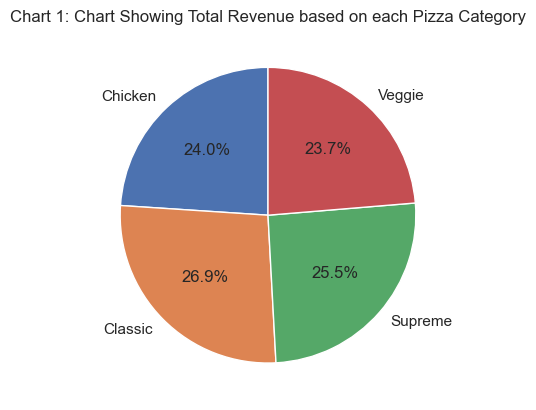

In [10]:
#Visualizing Total Revenue generated by category

plt.pie(revenue_by_category["amount"], labels = revenue_by_category["category"], startangle=90, autopct="%1.1f%%")
plt.title("Chart 1: Chart Showing Total Revenue based on each Pizza Category")
plt.savefig("pie_pizza_revenue.png", dpi=300, bbox_inches="tight")

plt.show()

The below table and charts 2 and 3 also compares the quantity sold by category with the amount generated by category. As evident on the charts, the 'Classic' category leads in terms of the number of pizza sold as well as in revenue. This is likely due to its lower average cost ($15.09) compared to other categories. The 'Chicken' category has the highest average cost and is the second lowest in terms of revenue generation. The Business must therefore ensure that the difference in cost for each category is minimal as information indicates that it affects the quantity sold.

In [11]:
total_quantity_cat = pizza_order.groupby("category").agg(quantity=("quantity","sum"), ave_cost=("amount", "mean")).reset_index()

total_quantity = total_quantity_cat["quantity"].sum()

total_quantity_cat

,category,quantity,ave_cost
0,Chicken,11050,18.115534
1,Classic,14888,15.093840
2,Supreme,11987,17.678271
3,Veggie,11649,16.917674


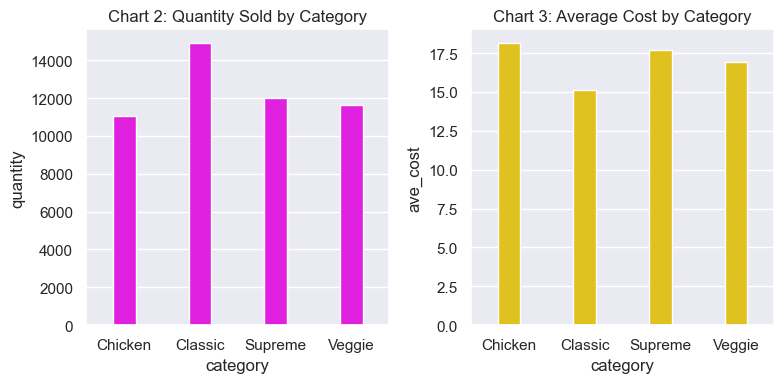

In [12]:
# Visualizing the Comparison

fig, axes = plt.subplots(1,2, figsize=(8, 4))

sns.barplot(data = total_quantity_cat, x=total_quantity_cat["category"], y=total_quantity_cat["quantity"], width=0.3, color="magenta", ax=axes[0])
axes[0].set_title("Chart 2: Quantity Sold by Category")

sns.barplot(data = total_quantity_cat, x=total_quantity_cat["category"], y=total_quantity_cat["ave_cost"], width=0.3, color="gold", ax=axes[1])
axes[1].set_title("Chart 3: Average Cost by Category")

plt.tight_layout()
plt.savefig("plot_qty_amountave_category.png", dpi=300, bbox_inches="tight")

plt.show()

### 3. Monthly, Daily and Hourly Sales

Sales pattern with time (Month, day and hour) were analysed and visualized. This will enable the outlet to make adequate preparation for expected orders especially in terms of staffing as well as stocking of necessary ingredients.

The table below and charts 4 & 5 show the revenue generated and the quantity of pizza sold through the months. July represents the month with the highest sales. This falls in the summer and the increase in sales may be due to the summer holidaying. To boost sales even further, Pizza oultet might engage in some additional marketing strategy in this period.

September and October also shows a sharp decline in sales, this might be attributed to many factors e.g cutting down on object due to back-to-school and return to home cooking. Outlet may key in to the National Pizza Month situated in octobers to drive sales.

In [13]:
#Monthly Sales
sold_month = pizza_order.groupby("month").agg(month_word = ("month_word", "first"), quantity=("quantity", "sum"), revenue=("amount", "sum")).reset_index()


sold_month

,month,month_word,quantity,revenue
0,1,January,4232,69793.30
1,2,February,3961,65159.60
2,3,March,4261,70397.10
3,4,April,4151,68736.80
4,5,May,4328,71402.75
5,6,June,4107,68230.20
6,7,July,4392,72557.90
7,8,August,4168,68278.25
8,9,September,3890,64180.05
9,10,October,3883,64027.60


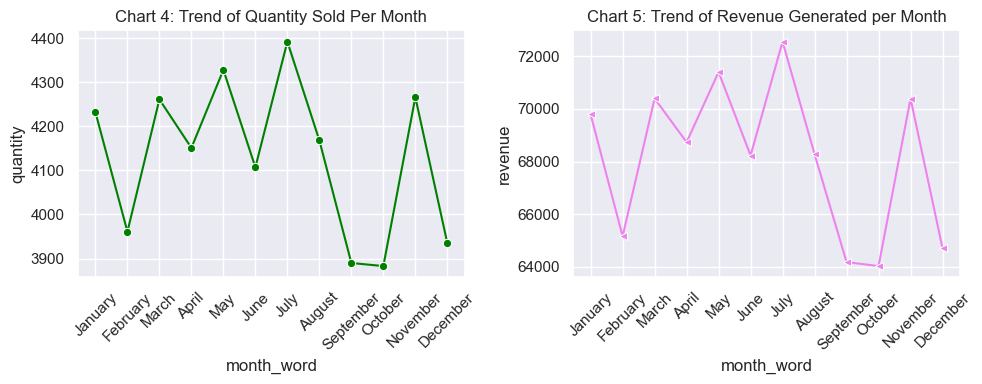

In [14]:
#Visualizing the result
fig, axes = plt.subplots(1,2, figsize=(10, 4))

sns.lineplot(data = sold_month, x=sold_month["month_word"], y=sold_month["quantity"], color="green", marker="o", ax=axes[0])
axes[0].set_title("Chart 4: Trend of Quantity Sold Per Month")
axes[0].tick_params(axis="x", labelrotation=45)

sns.lineplot(data = sold_month, x=sold_month["month_word"], y=sold_month["revenue"], color="violet", marker="<", ax=axes[1])
axes[1].set_title("Chart 5: Trend of Revenue Generated per Month")
axes[1].tick_params(axis="x", labelrotation=45)


plt.tight_layout()
plt.savefig("monthly_sales_chart.png", dpi=300, bbox_inches="tight")

plt.show()

As shown in below visual charts 6 and 7, Friday represents the day with the overall highest sales as well highest revenue amongst the days of the week while Sunday represent the day with the lowest sales as well as the lowest revenue. This might be cultural as Fridays represent the commencement of weekend breaks and there are social event fixed on it. Sunday is however a rest day for most people hence the low sales.

The charts show a progression of sales from Monday till it peaked at Friday and then drops on saturday. This might be driven by customer behaviour and work-week fatigue, which makes the demand for fast food increases as the week progresses.

In [15]:
#Daily Sales

pizza_daily = pizza_order.groupby("day")[["quantity", "amount"]].sum().reset_index()
day_of_week = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
pizza_daily["day"] = pd.Categorical(pizza_daily["day"], categories=day_of_week, ordered=True)
pizza_daily = pizza_daily.sort_values(by="day", ignore_index=True)
                                          

pizza_daily            

,day,quantity,amount
0,Sunday,6035,99203.50
1,Monday,6485,107329.55
2,Tuesday,6895,114133.80
3,Wednesday,6946,114408.40
4,Thursday,7478,123528.50
5,Friday,8242,136073.90
6,Saturday,7493,123182.40


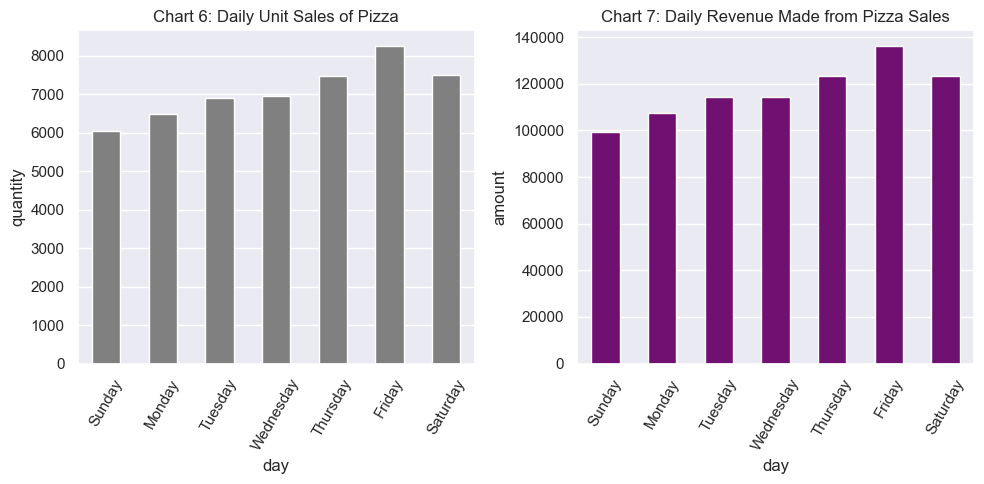

In [16]:
#Visualizing comparison between Unit of Pizza sold and revenue generated from pizza sales daily 

fig, axes = plt.subplots(1,2, figsize=(10, 5))

sns.barplot(data=pizza_daily, x="day", y="quantity", color="grey", width=0.5, ax=axes[0])
axes[0].set_title("Chart 6: Daily Unit Sales of Pizza")
axes[0].tick_params(axis="x", labelrotation=60)

sns.barplot(data=pizza_daily, x="day", y="amount", color="purple", width=0.5, ax=axes[1])
axes[1].set_title("Chart 7: Daily Revenue Made from Pizza Sales")
axes[1].tick_params(axis="x", labelrotation=60)

plt.tight_layout()
plt.savefig("daily_sales.png", dpi=300, bbox_inches="tight")
plt.show()

In [17]:
# hourly sales (quantity and revenue)
hourly_sales = pizza_order.groupby("hour")[["quantity", "amount"]].sum().sort_values(by="hour").reset_index()

hourly_sales

,hour,quantity,amount
0,9,4,83.00
1,10,18,303.65
2,11,2728,44935.80
3,12,6776,111877.90
4,13,6413,106065.70
5,14,3613,59201.40
6,15,3216,52992.30
7,16,4239,70055.40
8,17,5211,86237.45
9,18,5417,89296.85


However, looking at the hourly sales in Chart 8, the maximum sales occur between (12:00noon and 2:00pm) followed the periods between (5:00pm and 7:00pm). These periods represent the typical Break time off work/Lunch and dinner times respectively. These periods are also rush hours and the outlet is expected to make adequate arrangements of staffing and ingredients at these periods.

The minimum sales occur between late night and early morning between (10:00pm and 11:00am). This is expected as it is late night to early morning.

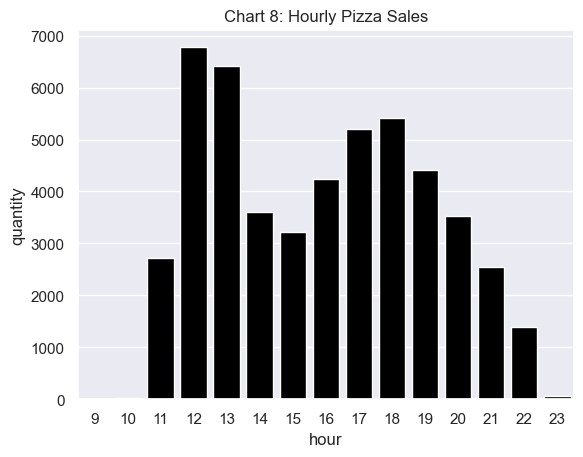

In [18]:
sns.barplot(data=hourly_sales, x=hourly_sales["hour"], y=hourly_sales["quantity"], color="black")
plt.title("Chart 8: Hourly Pizza Sales")
plt.savefig("hourly_revenue.png", dpi=300, bbox_inches="tight")

plt.show()


### 4. Analysis by Pizza Type

From the below table, the number of pizza types produced by the outlet is 32. The average cost of all pizza types is also on the table. 
The top 5 best selling pizzas, <u>in terms of quantities sold</u>, are:

- The Classic Deluxe Pizza
- The Barbecue Chicken Pizza
- The Hawaiian Pizza
- The Pepperoni Pizza
- The Thai Chicken Pizza
  
However, <u>in terms of revenue generated</u>, The Thai Chicken Pizza is the best performing pizza followed by "The Barbecue Chicken Pizza", "The Californian Chicken" before "The Classic Deluxe Pizza" and then "The Spicy Italian Chicken". This is due to the unit price of the different pizza types.

From the Bar Charts, The worst performing pizza, both in terms of revenue as well as quantities sold, is "The Brie Carre Pizza" with less than 500 order for the year. Other less performing pizza on the menu are with less than 1000 orders for the year and are conspicous on the chart.
"The Brie Carre Pizza" has the highest average price (24.14 USD) amongst all pizzas and this might contribute to its poor performance on the menu.

In [19]:
# Determining number of Pizza types and the average price of each type

pizza_types = pizza_order.groupby("name").agg(quantity=("quantity", "sum"), category=("category", "first"), ave_price=("amount", "mean"), amount=("amount", "sum")).sort_values(by="quantity", ascending=False).reset_index()


pizza_types

,name,quantity,category,ave_price,amount
0,The Classic Deluxe Pizza,2453,Classic,15.803187,38180.50
1,The Barbecue Chicken Pizza,2432,Chicken,18.030354,42768.00
2,The Hawaiian Pizza,2422,Classic,13.617405,32273.25
3,The Pepperoni Pizza,2418,Classic,12.731849,30161.75
4,The Thai Chicken Pizza,2371,Chicken,18.762095,43434.25
5,The California Chicken Pizza,2370,Chicken,17.988488,41409.50
6,The Sicilian Pizza,1938,Supreme,16.396661,30940.50
7,The Spicy Italian Pizza,1924,Supreme,18.458532,34831.25
8,The Southwest Chicken Pizza,1917,Chicken,18.411538,34705.75
9,The Big Meat Pizza,1914,Classic,12.682496,22968.00


In [20]:
# Printing the number of Pizza types and the five best selling pizzas

print(f"Total number of pizza types is {pizza_types["name"].count()} types\n\nThe top 5 best selling pizzas are:\n{pizza_types.iloc[0,0]}\n{pizza_types.iloc[1,0]}\n{pizza_types.iloc[2,0]}\n{pizza_types.iloc[3,0]}\n{pizza_types.iloc[4,0]}")

Total number of pizza types is 32 types

The top 5 best selling pizzas are:
The Classic Deluxe Pizza
The Barbecue Chicken Pizza
The Hawaiian Pizza
The Pepperoni Pizza
The Thai Chicken Pizza


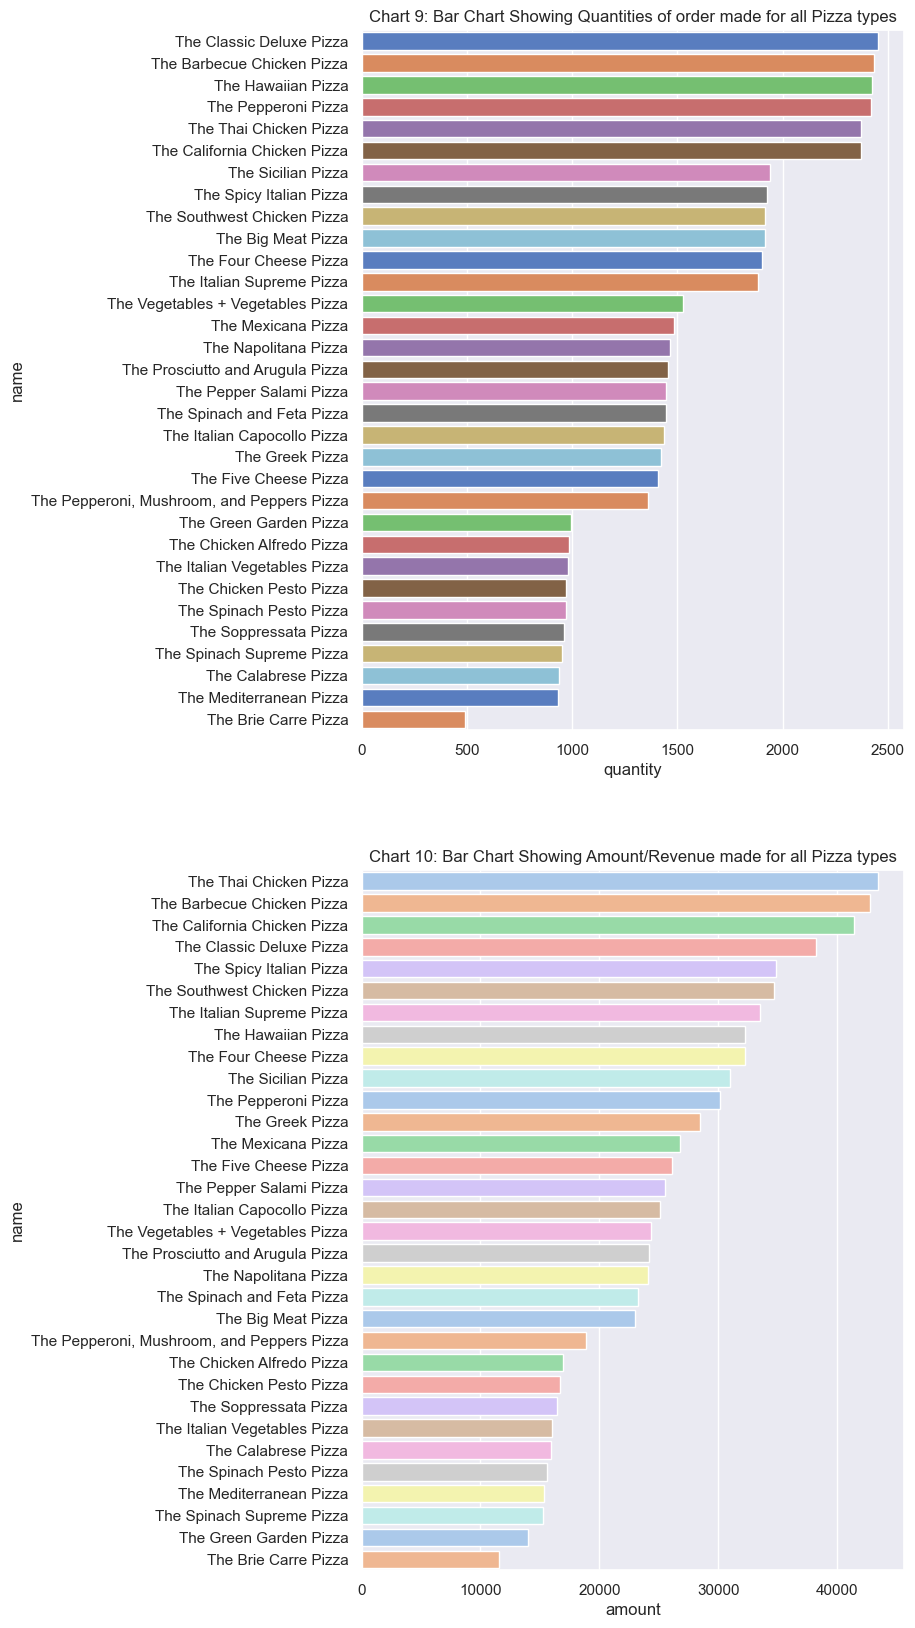

In [21]:
# Visualizing the Pizza Sales Performance

fig, axes = plt.subplots(2,1, figsize=(7,20))

sns.barplot(data=pizza_types, y="name", x="quantity", ax=axes[0], palette="muted", hue="name")
axes[0].set_title("Chart 9: Bar Chart Showing Quantities of order made for all Pizza types")

sns.barplot(data=pizza_types.sort_values(by="amount", ascending=False), y="name", x="amount", ax=axes[1], palette="pastel", hue="name")
axes[1].set_title("Chart 10: Bar Chart Showing Amount/Revenue made for all Pizza types")
plt.savefig("barh_pizzatypes_perf.png", dpi=300, bbox_inches="tight")
plt.show()

Check was also done on the distribution of pizza type by category as shown in below table and chart. The "Supreme" and "Veggie" categories have the most pizza products (28.1% each) while the "chicken" category has the least product (18.8%). however Four out of the Six Pizza types for "Chicken" category are among the best performing pizzas.

In [22]:
# Number of Pizza types for each Pizza Category

pizza_type_cat = pizza_types.groupby("category")["name"].count().reset_index()

pizza_type_cat

,category,name
0,Chicken,6
1,Classic,8
2,Supreme,9
3,Veggie,9


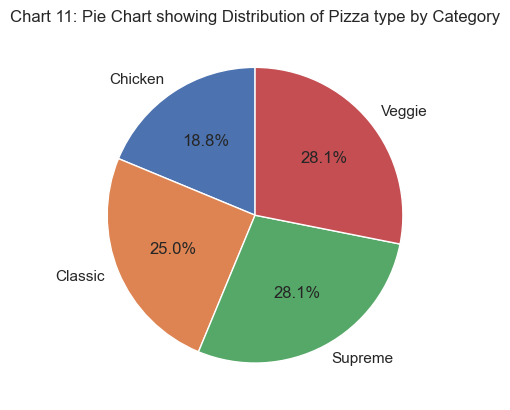

In [23]:
plt.pie(pizza_type_cat["name"], labels = pizza_type_cat["category"], startangle=90, autopct="%1.1f%%")
plt.savefig("pie_pizza_categ_num.png", dpi=300, bbox_inches="tight")
plt.title("Chart 11: Pie Chart showing Distribution of Pizza type by Category")

plt.show()

### 5. Analysis of Performance by Pizza Sizes

The outlet produces Pizzas in five (5) different sizes, Large, Medium, Small, Extra Large and Extra Extra Large. 

From the below chart, the best performing pizza size is the Large (L). This cuts across all categories of Pizza except for the "Classic" category where the best selling Pizza size is the Small (S) size. considering that the "classic" category has the lowest average cost, it can be deduced that low income earners, mostly workers, prefer to order individually as against Larger sizes that are shared with families and in small parties.

The XL and XXL sizes have very low perfomance, both taking just 1.2% of the total sales quantity. More promotional sales should be focused on these two categories to drive sales.

In [24]:
pizza_by_size = pizza_order.groupby(["size", "category"])[["quantity", "amount"]].sum().reset_index()

pizza_by_size

,size,category,quantity,amount
0,L,Chicken,4932,102339.00
1,L,Classic,4057,74518.50
2,L,Supreme,4564,94258.50
3,L,Veggie,5403,104202.70
4,M,Chicken,3894,65224.50
5,M,Classic,4112,60581.75
6,M,Supreme,4046,66475.00
7,M,Veggie,3583,57101.00
8,S,Chicken,2224,28356.00
9,S,Classic,6139,69870.25


In [25]:
pizza_size = pizza_order.groupby("size")[["quantity", "amount"]].sum().reset_index()

pizza_size

,size,quantity,amount
0,L,18956,375318.70
1,M,15635,249382.25
2,S,14403,178076.50
3,XL,552,14076.00
4,XXL,28,1006.60


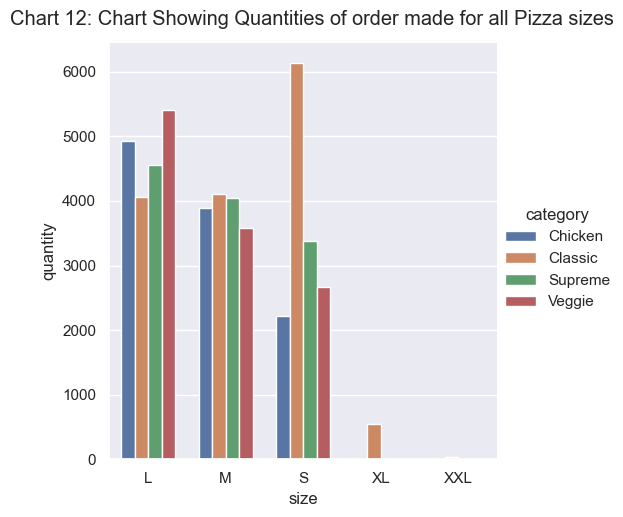

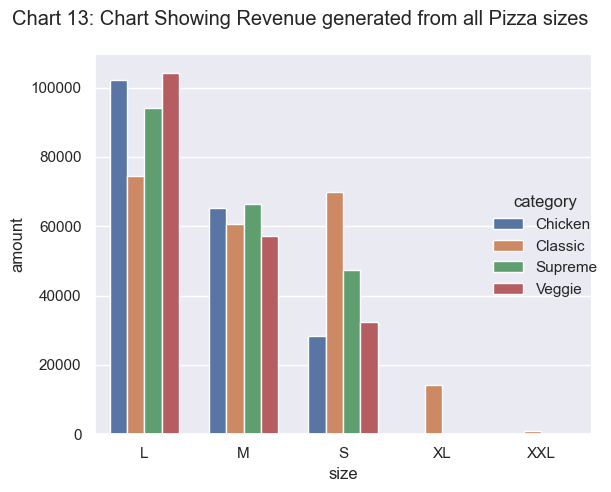

In [26]:
#Visualizing the Performance by size

ax1=sns.catplot(data=pizza_by_size, x="size", y="quantity", hue="category", kind="bar", width=0.7, ax=axes[0])
ax1.fig.suptitle("Chart 12: Chart Showing Quantities of order made for all Pizza sizes", y=1.03)

ax2 = sns.catplot(data=pizza_by_size, x="size", y="amount", hue="category", kind="bar", width=0.7)
ax2.fig.suptitle("Chart 13: Chart Showing Revenue generated from all Pizza sizes")

plt.savefig("pie_pizza_size.png", dpi=300, bbox_inches="tight")


plt.tight_layout()
plt.show()
                                             

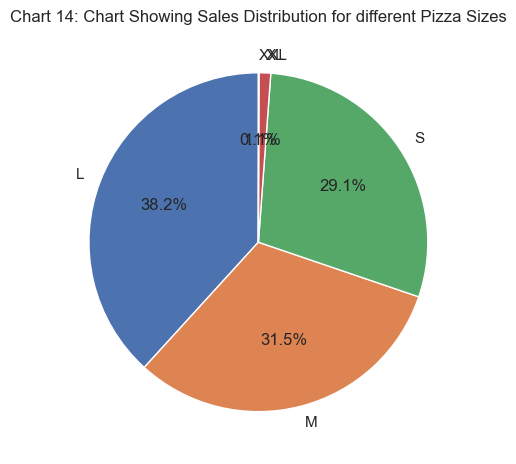

In [27]:
plt.pie(pizza_size["quantity"], labels = pizza_size["size"], startangle=90, autopct="%1.1f%%")
plt.title("Chart 14: Chart Showing Sales Distribution for different Pizza Sizes")
plt.tight_layout()

plt.show()

### 5. Analysis of Performance by Ingredients

A major selling point for Pizza is its taste and the most important factor that determines this is the ingredients hence, analysis was done on the ingredients usage for all pizza.

It was observed that a total of Sixty-Six (66) ingredients are being used for all pizza types. 
Effort was also made to determine the ingredient usage rate for them all. it was observed that apart from 'Mozarella Cheese" which is a common ingredient, the most used ingredients are *Tomato Sauce*, *Garlic*, *Tomato* followed by *Red onions* and then *Red Pepper*. A detailed visualization for the Top and bottom ten ingredients are as shown in Chart 15.

Also, other 'Sauce' ingredients were found to have 24.44% of the total usage while *Tomato Sauce* takes the remaining 75.56%.

At the Bottom of the least are 5 ingredients which were, upon further confirmation, found to be unique ingredients for *The Brie Carre Pizza* which is the least performing pizza in terms of sales. 

In [28]:
#Preparing the "Ingredients" column
pizza_order["ingredients"] = pizza_order["ingredients"].astype(str).str.split(",")
pizza_order_ing = pizza_order.explode("ingredients")
pizza_order_ing["ingredients"] = pizza_order_ing["ingredients"].astype(str).str.strip()
pizza_order_ing["ingredients"] = pizza_order_ing["ingredients"].str.lower()

pizza_order_ing

,order_details_id,order_id,name,size,category,ingredients,quantity,price,amount,date,time,month,month_word,day,hour
0,1,1,The Hawaiian Pizza,M,Classic,sliced ham,1,13.25,13.25,2015-01-01,11:38:36,1,January,Thursday,11
0,1,1,The Hawaiian Pizza,M,Classic,pineapple,1,13.25,13.25,2015-01-01,11:38:36,1,January,Thursday,11
0,1,1,The Hawaiian Pizza,M,Classic,mozzarella cheese,1,13.25,13.25,2015-01-01,11:38:36,1,January,Thursday,11
1,2,2,The Classic Deluxe Pizza,M,Classic,pepperoni,1,16.00,16.00,2015-01-01,11:57:40,1,January,Thursday,11
1,2,2,The Classic Deluxe Pizza,M,Classic,mushrooms,1,16.00,16.00,2015-01-01,11:57:40,1,January,Thursday,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48619,48620,21350,The Barbecue Chicken Pizza,S,Chicken,red peppers,1,12.75,12.75,2015-12-31,23:02:05,12,December,Thursday,23
48619,48620,21350,The Barbecue Chicken Pizza,S,Chicken,green peppers,1,12.75,12.75,2015-12-31,23:02:05,12,December,Thursday,23
48619,48620,21350,The Barbecue Chicken Pizza,S,Chicken,tomatoes,1,12.75,12.75,2015-12-31,23:02:05,12,December,Thursday,23
48619,48620,21350,The Barbecue Chicken Pizza,S,Chicken,red onions,1,12.75,12.75,2015-12-31,23:02:05,12,December,Thursday,23


In [29]:
pizza_by_ing = pizza_order_ing.groupby("ingredients")["quantity"].sum().reset_index()

pizza_by_ing.sort_values(by="quantity", ascending=False, inplace=True, ignore_index=True)

pizza_by_ing["ingredient_usage"] = 100 * pizza_by_ing["quantity"] / total_quantity

pizza_by_ing

,ingredients,quantity,ingredient_usage
0,garlic,27913,56.305725
1,tomatoes,27052,54.568927
2,red onions,19834,40.008876
3,red peppers,16562,33.408642
4,mozzarella cheese,10569,21.319643
...,...,...,...
60,caramelized onions,490,0.988421
61,brie carre cheese,490,0.988421
62,pears,490,0.988421
63,prosciutto,490,0.988421


In [30]:
#Adjust values for mozzarella cheese based on provided information

#pizza_by_ing.at(4,"quantity") = total_quantity
pizza_by_ing.loc[pizza_by_ing["ingredients"] == "mozzarella cheese", "quantity"] = total_quantity
pizza_by_ing.loc[pizza_by_ing["ingredients"] == "mozzarella cheese", "ingredient_usage"] = 100

pizza_by_ing


,ingredients,quantity,ingredient_usage
0,garlic,27913,56.305725
1,tomatoes,27052,54.568927
2,red onions,19834,40.008876
3,red peppers,16562,33.408642
4,mozzarella cheese,49574,100.000000
...,...,...,...
60,caramelized onions,490,0.988421
61,brie carre cheese,490,0.988421
62,pears,490,0.988421
63,prosciutto,490,0.988421


In [31]:
#Add value for tomato sauce as indicated in information given in "data_dictionary.csv" file

pizza_sauce = pizza_by_ing[pizza_by_ing["ingredients"].str.contains("sauce", case=False, na=False)].reset_index() #Extracting other "sauce" ingredients  
pizza_sauce = pizza_sauce.drop(columns="index")

pizza_sauce

,ingredients,quantity,ingredient_usage
0,chipotle sauce,3401,6.860451
1,pesto sauce,2924,5.898253
2,barbecue sauce,2432,4.905797
3,thai sweet chilli sauce,2371,4.782749
4,alfredo sauce,987,1.990963


In [32]:
#Adding "tomato sauce" to dataframe
quantity_tomato_sauce = total_quantity - pizza_sauce["quantity"].sum()
usage =  100 * quantity_tomato_sauce / total_quantity
pizza_by_ing.loc[len(pizza_by_ing)] = ["tomato sauce", quantity_tomato_sauce, usage]

pizza_by_ing

,ingredients,quantity,ingredient_usage
0,garlic,27913,56.305725
1,tomatoes,27052,54.568927
2,red onions,19834,40.008876
3,red peppers,16562,33.408642
4,mozzarella cheese,49574,100.000000
...,...,...,...
61,brie carre cheese,490,0.988421
62,pears,490,0.988421
63,prosciutto,490,0.988421
64,thyme,490,0.988421


In [33]:
#Confirming the ingredients in The Brie Carre Pizza
pizza_order[pizza_order["name"] == "The Brie Carre Pizza"]["ingredients"] 

print(f"The ingredients used for the Brie Carre Pizza are {pizza_order.iloc[427,5]}")

The ingredients used for the Brie Carre Pizza are ['Brie Carre Cheese', ' Prosciutto', ' Caramelized Onions', ' Pears', ' Thyme', ' Garlic']


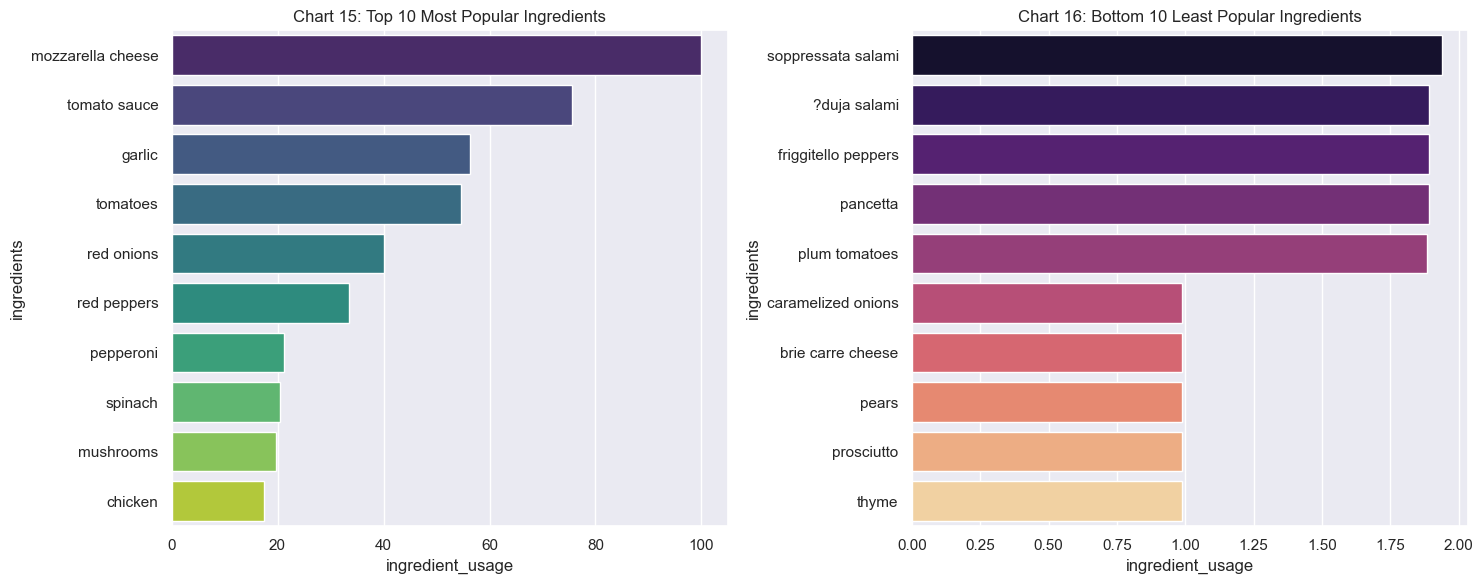

In [34]:
#Visualizing the analyses using "Top and Bottom" Charts

pizza_by_ing_sorted = pizza_by_ing.sort_values('ingredient_usage', ascending=False)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Top 10 Ingredients
sns.barplot(data=pizza_by_ing_sorted.head(10), x='ingredient_usage', y='ingredients', hue="ingredients", 
            legend=False, palette='viridis', ax=ax1)

ax1.set_title('Chart 15: Top 10 Most Popular Ingredients')

# Bottom 10 Ingredients
sns.barplot(data=pizza_by_ing_sorted.tail(10), x='ingredient_usage', y='ingredients', hue="ingredients", legend=False,
            palette='magma', ax=ax2)
ax2.set_title('Chart 16: Bottom 10 Least Popular Ingredients')

plt.tight_layout()
plt.savefig("top_bot_ingredient.png", dpi=300, bbox_inches="tight")

plt.show()

### Recommendations and Conclusion

From the analysis done on the data and the visualizations. it is evident that:

A total of 49,574 Units of pizza was bought in 21,350 orders. The outlet is advised to, through Creation of *Party Packs* or *Tiered Pricing*,further encourage the practice of ordering multiple pizza units by customers.

The average cost of Pizza was found to be $16.50. The outlet is advised to confirm pricing of competitors as cost has been found to have a great impact on Pizza sales.

All Four categories of Pizza are viable and they all contribute significantly to the total revenue. The outlet is therefore advised to sustain these categories.

The "Classic" Pizza category is the greatest contributor to the total revenue. it also has the lowest average price. The outlet can leverage on this to even scale up their sales.

The highest performance, both in terms of sales as well as in terms of revenue generated, occured in July. Outlet is advised to key in to the *National Pizza Month* situated in octobers to drive sales.

Daily, the maximum sales occur between (12:00noon and 2:00pm) followed by the periods between (5:00pm and 7:00pm). These two peak periods correspond with official Lunch break time and dinner time. The minimum sales occur between late night and early morning between (10:00pm and 11:00am). These exposition can assist the sales outlet in managaging their staffing availability and ingredient stocking.

In terms of revenue generated, *The Thai Chicken Pizza* ranks highest while *The Classic Deluxe Pizza* is the highest in terms of quantity sold. This is due to the higher cost for *The Thai Chicken Pizza*.

The lowest performing pizza, *The Brie Carrie PIzza* was found to have the highest price amongst all Pizza. It also has unique ingredients. This can assist in digging deeper into the reason for its non-performance.

The Large size pizza is the best selling amongst all sizes. This shows that a very good percentage of customers get Pizza for families and small party groups. A significant customer size also patronize the *low-cost, small-sized (S), classic category Pizza*. This customer subset are most likely low earning workers. The outlet is expected to sustain this low-cost pizza category and leverage on this strength.
